Базовая часть с 3 пунктом дополнения 

Введите тип фигуры (rectangle, triangle, hexagon): triangle


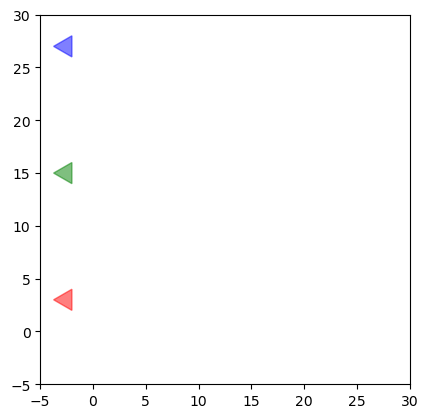

График успешно отрисован.


In [12]:
import math
from itertools import cycle, islice
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

class Transformation:
    @staticmethod
    def tr_translate(polygons, dx, dy):  # Перемещает каждый многоугольник на dx по оси x и на dy по оси y
        translated_polygons = []
        for polygon in polygons:
            translated_polygon = [(x + dx, y + dy) for x, y in polygon]
            translated_polygons.append(translated_polygon)
        return translated_polygons

    @staticmethod
    def tr_rotate(polygons, angle): # Поворачивает каждый многоугольник на заданный угол
        rotated_polygons = []
        for polygon in polygons:
            rotated_polygon = [(x * math.cos(angle) - y * math.sin(angle),
                                x * math.sin(angle) + y * math.cos(angle))
                               for x, y in polygon]
            rotated_polygons.append(rotated_polygon)
        return rotated_polygons

    @staticmethod
    def tr_symmetry(polygons, axis):  # Отражает каждый многоугольник относительно оси x или y
        mirrored_polygons = []
        if axis == 'x':
            for polygon in polygons:
                mirrored_polygon = [(x, -y) for x, y in polygon]
                mirrored_polygons.append(mirrored_polygon)
        elif axis == 'y':
            for polygon in polygons:
                mirrored_polygon = [(-x, y) for x, y in polygon]
                mirrored_polygons.append(mirrored_polygon)
        return mirrored_polygons

    @staticmethod
    def tr_homothety(polygons, scale):  # Масштабирует каждый многоугольник на заданный коэффициент
        homothetized_polygons = []
        for polygon in polygons:
            homothetized_polygon = [(x * scale, y * scale) for x, y in polygon]
            homothetized_polygons.append(homothetized_polygon)
        return homothetized_polygons

class PolygonSequence:
    def __init__(self, generator):  # Генерирует полигон
        self.polygons = []
        for _ in range(7):
            self.polygons.append(next(generator))

    def visualize(self, num_figures):  #рисует многоугольники 
        fig, ax = plt.subplots()
        ax.set_aspect('equal', 'box')

        colors = cycle(['r', 'g', 'b', 'y', 'm', 'c'])  # Цвета для полигонов

        for i in range(num_figures):     
            polygon = self.polygons[i]
            color = next(colors)
            poly_patch = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
            ax.add_patch(poly_patch)

        # Увеличим масштаб графика
        plt.xlim(-5, 30)
        plt.ylim(-5, 30)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
        print("График успешно отрисован.")

    def map(self, transformation, *args):  # Применяет функцию к многоугольникам 
        if transformation == 'translate':
            self.polygons = Transformation.tr_translate(self.polygons, *args)
        elif transformation == 'rotate':
            self.polygons = Transformation.tr_rotate(self.polygons, *args)
        elif transformation == 'symmetry':
            self.polygons = Transformation.tr_symmetry(self.polygons, *args)
        elif transformation == 'homothety':
            self.polygons = Transformation.tr_homothety(self.polygons, *args)

def gen_rectangle(start_x, start_y, width, height):   # Генерирует фигуры с заданными координатами и размерами 
    return ((start_x, start_y), (start_x, start_y + height), (start_x + width, start_y + height),
            (start_x + width, start_y))

def gen_triangle(start_x, start_y, side_length, height):
    return ((start_x, start_y), (start_x + side_length / 2, start_y + height),
            (start_x + side_length, start_y))

def gen_hexagon(start_x, start_y, side_length, height):
    return ((start_x, start_y), (start_x + side_length / 2, start_y + height),
            (start_x + 3 * side_length / 2, start_y + height), (start_x + 2 * side_length, start_y),
            (start_x + 3 * side_length / 2, start_y - height), (start_x + side_length / 2, start_y - height),
            (start_x, start_y))

def create_sequence_of_figures(figure_type):
    if figure_type == 'rectangle':
        generator = generate_infinite_sequence(gen_rectangle)
    elif figure_type == 'triangle':
        generator = generate_infinite_sequence(gen_triangle)
    elif figure_type == 'hexagon':
        generator = generate_infinite_sequence(gen_hexagon)
    else:
        raise ValueError("Invalid figure type")
    return PolygonSequence(generator)

def generate_infinite_sequence(func):  
    start_x = 0
    start_y = 0
    side_length = 1

    while True:
        if func.__name__ == 'gen_rectangle':
            yield func(start_x, start_y, side_length, side_length)
        elif func.__name__ == 'gen_triangle':
            height = side_length * math.sqrt(3) / 2
            yield func(start_x, start_y, side_length, height)
        elif func.__name__ == 'gen_hexagon':
            height = side_length * math.sqrt(3)
            yield func(start_x, start_y, side_length, height)
        start_x += 6 * side_length

figure_type = input("Введите тип фигуры (rectangle, triangle, hexagon): ")
sequence_of_figures = create_sequence_of_figures(figure_type)


sequence_of_figures.map('translate', 1, 1)
sequence_of_figures.map('rotate', math.pi/2)
sequence_of_figures.map('homothety', 2)

sequence_of_figures.visualize(7)

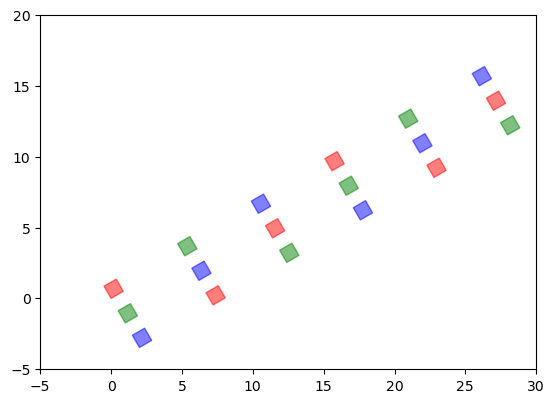

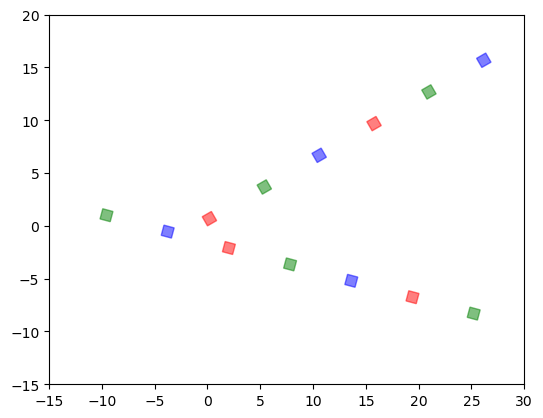

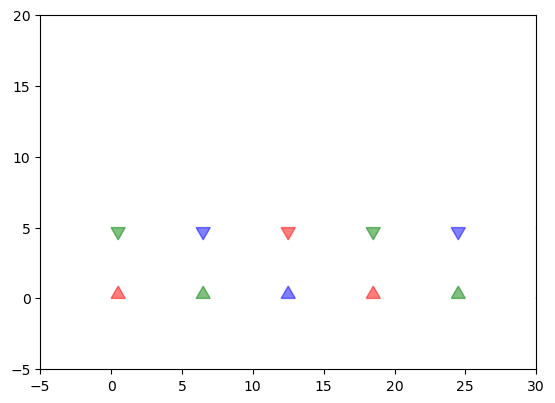

In [10]:
import math
from itertools import cycle, islice, chain
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

class Transformation:
    @staticmethod
    def translate(polygons, dx, dy):
        # Перемещает каждый многоугольник на dx по оси x и на dy по оси y
        translated_polygons = []
        for polygon in polygons:
            translated_polygon = [(x + dx, y + dy) for x, y in polygon]
            translated_polygons.append(translated_polygon)
        return translated_polygons

    @staticmethod
    def rotate(polygons, angle):
        # Поворачивает каждый многоугольник на заданный угол
        rotated_polygons = []
        for polygon in polygons:
            rotated_polygon = [(x * math.cos(angle) - y * math.sin(angle),
                                x * math.sin(angle) + y * math.cos(angle))
                               for x, y in polygon]
            rotated_polygons.append(rotated_polygon)
        return rotated_polygons

    @staticmethod
    def symmetry(polygons, axis):
        # Отражает каждый многоугольник относительно оси x или y
        mirrored_polygons = []
        if axis == 'x':
            for polygon in polygons:
                mirrored_polygon = [(x, -y) for x, y in polygon]
                mirrored_polygons.append(mirrored_polygon)
        elif axis == 'y':
            for polygon in polygons:
                mirrored_polygon = [(-x, y) for x, y in polygon]
                mirrored_polygons.append(mirrored_polygon)
        return mirrored_polygons

    @staticmethod
    def homothety(polygons, scale):
        # Масштабирует каждый многоугольник на заданный коэффициент
        homothetized_polygons = []
        for polygon in polygons:
            homothetized_polygon = [(x * scale, y * scale) for x, y in polygon]
            homothetized_polygons.append(homothetized_polygon)
        return homothetized_polygons

# Класс PolygonSequence управляет последовательностью многоугольников
class PolygonSequence:
    def __init__(self, generator):
        # Инициализирует последовательность из 7 многоугольников, сгенерированных указанным генератором
        self.polygons = []
        for _ in range(7):
            self.polygons.append(next(generator))

    def visualize(self, num_figures):
        # Визуализирует многоугольники
        fig, ax = plt.subplots()
        ax.set_aspect('equal', 'box')

        # Циклически выбирает цвета для многоугольников
        colors = cycle(['r', 'g', 'b', 'y', 'm', 'c'])

        for i in range(num_figures):
            polygon = self.polygons[i]
            color = next(colors)
            # Создает патч для каждого многоугольника и добавляет его на график
            poly_patch = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
            ax.add_patch(poly_patch)

        # Увеличивает масштаб графика
        plt.xlim(-5, 30)
        plt.ylim(-5, 30)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
        print("График успешно отрисован.")

    def map(self, transformation, *args):
        # Применяет указанное преобразование к многоугольникам
        if transformation == 'translate':
            self.polygons = Transformation.translate(self.polygons, *args)
        elif transformation == 'rotate':
            self.polygons = Transformation.rotate(self.polygons, *args)
        elif transformation == 'symmetry':
            self.polygons = Transformation.symmetry(self.polygons, *args)
        elif transformation == 'homothety':
            self.polygons = Transformation.homothety(self.polygons, *args)

# Функции для генерации различных типов многоугольников
def gen_rectangle(start_x, start_y, width, height):
    # Генерирует прямоугольник с заданными координатами и размерами
    return ((start_x, start_y), (start_x, start_y + height), (start_x + width, start_y + height),
            (start_x + width, start_y))

def gen_triangle(start_x, start_y, side_length, height):
    # Генерирует треугольник с заданными координатами и размерами
    return ((start_x, start_y), (start_x + side_length / 2, start_y + height),
            (start_x + side_length, start_y))

def gen_hexagon(start_x, start_y, side_length, height):
    # Генерирует шестиугольник с заданными координатами и размерами
    return ((start_x, start_y), (start_x + side_length / 2, start_y + height),
            (start_x + 3 * side_length / 2, start_y + height), (start_x + 2 * side_length, start_y),
            (start_x + 3 * side_length / 2, start_y - height), (start_x + side_length / 2, start_y - height),
            (start_x, start_y))

def create_sequence_of_figures(figure_type):
    # Создает последовательность многоугольников указанного типа
    if figure_type == 'rectangle':
        generator = generate_infinite_sequence(gen_rectangle)
    elif figure_type == 'triangle':
        generator = generate_infinite_sequence(gen_triangle)
    elif figure_type == 'hexagon':
        generator = generate_infinite_sequence(gen_hexagon)
    else:
        raise ValueError("Invalid figure type")
    return PolygonSequence(generator)

def generate_infinite_sequence(func):
    # Генерирует бесконечную последовательность многоугольников, начиная с заданных координат
    start_x = 0
    start_y = 0
    side_length = 1

    while True:
        if func.__name__ == 'gen_rectangle':
            yield func(start_x, start_y, side_length, side_length)
        elif func.__name__ == 'gen_triangle':
            height = side_length * math.sqrt(3) / 2
            yield func(start_x, start_y, side_length, height)
        elif func.__name__ == 'gen_hexagon':
            height = side_length * math.sqrt(3)
            yield func(start_x, start_y, side_length, height)
        start_x += 6 * side_length

# Пример, три последовательности прямоугольников 
sequence_of_rectangles = PolygonSequence(generate_infinite_sequence(gen_rectangle))
sequence_of_rectangles_second = PolygonSequence(generate_infinite_sequence(gen_rectangle))
sequence_of_rectangles_third = PolygonSequence(generate_infinite_sequence(gen_rectangle))

# Перемещаем вторую и третью последовательности по оси y
sequence_of_rectangles_second.map('translate', 0, -2)
sequence_of_rectangles_third.map('translate', 0, -4)

# Устанавливаем угол вращения
angle = math.pi / 6

# Поворачиваем все три последовательности на заданный угол
sequence_of_rectangles.map('rotate', angle)
sequence_of_rectangles_second.map('rotate', angle)
sequence_of_rectangles_third.map('rotate', angle)

# Визуализируем все три последовательности
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')

colors = cycle(['r', 'g', 'b'])

for i in range(7):
    polygon = sequence_of_rectangles.polygons[i]
    color = next(colors)
    poly_patch = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
    ax.add_patch(poly_patch)

for i in range(7):
    polygon = sequence_of_rectangles_second.polygons[i]
    color = next(colors)
    poly_patch = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
    ax.add_patch(poly_patch)

for i in range(7):
    polygon = sequence_of_rectangles_third.polygons[i]
    color = next(colors)
    poly_patch = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
    ax.add_patch(poly_patch)

plt.xlim(-5, 30)
plt.ylim(-5, 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Создаем заново первую и вторую последовательности прямоугольников
sequence_of_rectangles = PolygonSequence(generate_infinite_sequence(gen_rectangle))
sequence_of_rectangles_second = PolygonSequence(generate_infinite_sequence(gen_rectangle))

# Перемещаем вторую и третью последовательности по оси x и y
sequence_of_rectangles_second.map('translate', -10, -2)
sequence_of_rectangles_third.map('translate', -10, -4)

# Поворачиваем первую последовательность на угол pi/6 и вторую на -pi/12
sequence_of_rectangles.map('rotate', math.pi / 6)
sequence_of_rectangles_second.map('rotate', math.pi / -12)

#рисуем первую и вторую последовательности
fig, ax = plt.subplots()  
ax.set_aspect('equal', 'box')

colors = cycle(['r', 'g', 'b'])


for i in range(7):
    polygon = sequence_of_rectangles.polygons[i]
    color = next(colors)
    poly_patch = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
    ax.add_patch(poly_patch)


for i in range(7):
    polygon = sequence_of_rectangles_second.polygons[i]
    color = next(colors)
    poly_patch = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
    ax.add_patch(poly_patch)

plt.xlim(-15, 30)
plt.ylim(-15, 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


sequence_of_triangles = PolygonSequence(generate_infinite_sequence(gen_triangle))
sequence_of_triangles_second = PolygonSequence(generate_infinite_sequence(gen_triangle))

sequence_of_triangles_second.map('symmetry', 'x')
sequence_of_triangles_second.map('translate', 0, 5)


fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')

colors = cycle(['r', 'g', 'b'])


for i in range(7):
    polygon = sequence_of_triangles.polygons[i]
    color = next(colors)
    poly_patch3 = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
    ax.add_patch(poly_patch3)

for i in range(7):
    polygon = sequence_of_triangles_second.polygons[i]
    color = next(colors)
    poly_patch3 = Polygon(polygon, closed=True, fill=True, color=color, alpha=0.5)
    ax.add_patch(poly_patch3)

plt.xlim(-5, 30)
plt.ylim(-5, 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show() 